# Phys 481 Assignment: Fourier Transform

Gisu Ham 10134838

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import scipy.integrate as integrate

# Introduction
In this notebook, I explore methods of discrete and continuous numerical fourier transform and discuss its properties, shortcoming, and examples of fourier transformed functions. In particular, DFT vs FT is discussed 

## Task 1 :Write functions to numerically evaluate each of the the cosine and sine transforms

  $$ F_s(k) = \sqrt{\frac{1}{\pi}} \int_{-\infty}^{+\infty} f(x) \; \sin(2\pi x k) \; dx $$
  
   $$ F_c(k) = \sqrt{\frac{1}{\pi}} \int_{-\infty}^{+\infty} f(x) \; \cos(2\pi x k) \; dx $$

Here we use scipy.integrate.quad to evaluate the integral. Since it requires function as an input, lambda (Anonymous) function becomes handy here. While the method of defining Lambda function is different from the regular function, it is indistinguishable from the regular function in terms of object type, which means they serve the same purpose:

In [2]:
def trivial_function():
    """trivial function. No input. Returns None"""
    return None


In [3]:
assert type(lambda x: x)==type(trivial_function)

now define functions

In [4]:
def trig_factory(k,trig="sin"):
    """generates cosine, sin, and tangent (lambda) function with coefficient 2 pi k x using lambda notation
    args:
        k (float): constant factor
        trig (str): 'sin' for sin, 'cos' for cos, 'tan' for tangent  
        
    returns:
        corresponding lambda function. cos/sin/tan"""
    
    if trig=="sin":
        func= lambda x: np.sin(2*np.pi*x*k)
        return func
    if trig=="cos":
        func= lambda x: np.cos(2*np.pi*x*k)
        return func
    if trig=="tan":
        func= lambda x: np.tan(2*np.pi*x*k)
        return func

def transform(const,func1,kvals,trig,lim=[-np.infty,np.infty]):
    """performs scipy.integrate.quad on the product of two functions, one trigonometry.
    
    args:
        const(float): constant to multiply the result by
        func1 (function): function to be transformed f(x)
        kvals (np.ndarray): list of coordinates of variable conjugate to the input functio
        trig (string): type of trigonometry to perform transformation with. 
        lim(list, length 2): limit of the integral. default=[-inf,inf]
        
    returns:
        result(list): result of integral of product of fun1 and func2 with the limit"""
    
    result=[]
    
    for k in kvals:
        funct= lambda x: func1(x)*trig_factory(k,trig=trig)(x)
        r1,r2=integrate.quad(funct,lim[0],lim[1])
        result.append(const*r1)
    
    return result

To test the above functions, first recognize that

$$ F_s(k) -i F_c(k) $$

is the definition of fourier transform (up to some constant) by Euler's identity $(e^{\pm ix}=cos(x)\pm isin(x))$.
$$F(k)=\sqrt{\pi}(F_s(k)-F_c(k))=\int_{-\infty}^{\infty}f(x)e^{-i2\pi x k}dx$$

Let

$$f(x)=sin(2 \pi x)+ sin(4 \pi x)$$

which is a sum of two sin functions with frequencies 1 and 2. I expect the FFT of this to have 4 peaks: $\pm 1,2$.

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
C:\Users\David\Miniconda3\envs\p36\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


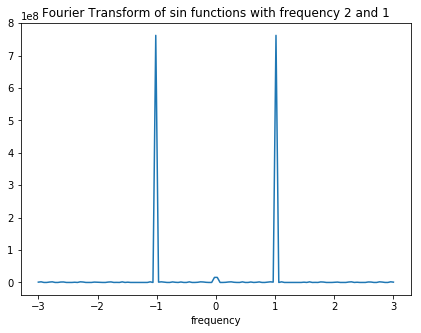

In [5]:
def simple_sin():
    """returns anaoymous function of sum of two sin functions with frequency 1 and 2
    args:
        None
    returns:
        anonymous function given in the description"""
    return lambda x: np.sin(2*np.pi*x)+np.sin(4*np.pi*x)

# list of k vaues (coordinates of f.transformed space)
kvals=np.linspace(-3.0,3.0,128)
lim=[-np.infty,np.infty]

#results for cos t and sin t

resultcos=transform(np.pi,simple_sin(),kvals,'cos',lim=lim)
resultsin=transform(np.pi,simple_sin(),kvals,'sin',lim=lim)

#figs
plt.figure(figsize=[7,5])
plt.plot(kvals,np.abs(np.array(resultcos,dtype='complex') + 1j*np.array(resultsin,dtype='complex')))
plt.title("Fourier Transform of sin functions with frequency 2 and 1")
plt.xlabel("frequency")

plt.show()

it's clear that the two peaks ($\pm 2$) are missing. Changing the limit of integration from $[-\infty,\infty]$ to a smaller bound [-10,10] gives

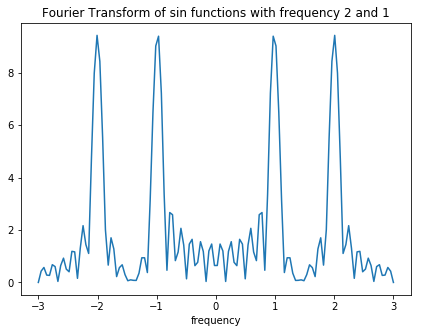

In [6]:
lim=[-3,3]
resultcos=transform(np.pi,simple_sin(),kvals,'cos',lim=lim)
resultsin=transform(np.pi,simple_sin(),kvals,'sin',lim=lim)

plt.figure(figsize=[7,5])
plt.plot(kvals,np.abs(np.array(resultcos,dtype='complex') - 1j*np.array(resultsin,dtype='complex')))
plt.title("Fourier Transform of sin functions with frequency 2 and 1")
plt.xlabel("frequency")

plt.show()

An improvement over the infinite range limit as all the expected peaks are present, but now the contributions from frequencies near $\pm 1,2$ are visibly non zero since the limit is no longer infinity (spectral leak). In general, it's preferable to use DFT, but it does have its drawbacks. See the next sections.

## Task 2: Write a function to numerically evaluate the Fourier transform.

https://en.wikipedia.org/wiki/Fourier_transform
    
$$ F(k) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} f(x) \; e^{-ikx} \; dx $$

Choice of Fourier Transform convention is arbitrary, and I prefer this one:

$$ F(k) =  \int_{-\infty}^{+\infty} f(x) \; e^{-i2\pi kx} \; dx $$

Which was already done in Task1 using Euler's identity. So I copy and paste above code

In [10]:
def fourier_transform(func,kvals,lim=[-np.infty,np.infty]):
    """performs fourier transform
    args:
        func (function): function f(x) to be fourier transformed
        kvals (np.ndarray): list of coordinates of variable conjugate to the input function
    
    returns:
        result of fourier transform in np.ndarray"""
    
    resultcos=transform(1,func,kvals,'cos',lim=lim)
    resultsin=transform(1,func,kvals,'sin',lim=lim)
    
    return np.array(resultcos,dtype='complex') - 1j*np.array(resultsin,dtype='complex')

I conclude this section by demonstrating how fourier transform 'changes' a gaussian function:

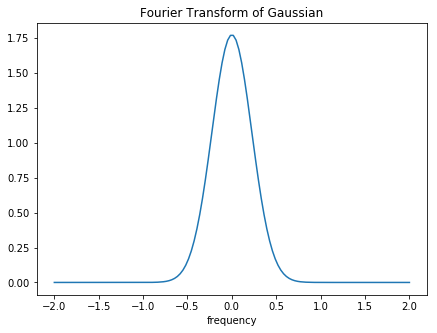

In [11]:
kvals=np.linspace(-2.0,2.0,128)
gauss=fourier_transform(lambda x: np.exp(-x**2),kvals)

#no large complex components
assert np.imag(np.max(gauss))<0.001

plt.figure(figsize=[7,5])
plt.plot(kvals,np.real(gauss))
plt.title("Fourier Transform of Gaussian")
plt.xlabel("frequency")
plt.show()

which is also a Gaussian. http://mathworld.wolfram.com/FourierTransformGaussian.html

## Fourier Transform II
### Task: Write a python function called "plot_fourier4(f,t)" to generate sets of 2x2 figures exactly as shown*.
\* refer to phys481_week10_fourier_part2

### np.fft.fftfreq dilemma

np.fft.fftfreq is a very convenient function as it prevents python users from having headaches of converting numerical coordinate space between two conjugate variables (i.e time and frequency), but it's output can be difficult to work with:

In [12]:
np.fft.fftfreq(5)

array([ 0. ,  0.2,  0.4, -0.4, -0.2])

It lists coordinate from 0 to positive numbers, and then negatives numbers. When plotting using continuous line, it connects point on the right edge to the point on left edge like:

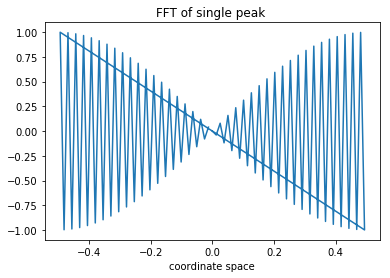

In [13]:
t=np.linspace(-1,1,79)
tfunc=np.zeros(len(t),dtype='complex')
tfunc[len(t)//2]=1

plt.plot(np.fft.fftfreq(79),np.imag(np.fft.fft(tfunc)))
plt.title("FFT of single peak ")
plt.xlabel('coordinate space')
plt.show()

we can always mask the endpoints or divide plot into two, but I prefer to preserve the length of the plotting array for consistency. So instead, I write unwrap_fft that resolves this.

In [14]:
def unwrap_fft(t):
    """Unwraps the fft frequency or fft function so that the order of np.fft.fftfreq is negative -> 0 -> positive 
    ex. [0,1,-1]-> [-1,0,1]
    Must be applied on both the x and F(x) to make the resulting plot point-wise invariant.
    args:
        t (np.ndarray): input data
    returns:
        t (np.ndarray): unwrapped data"""
    
    if len(t)%2==0: # even
        store=np.zeros(len(t)//2,dtype='complex')
        store[:]=t[len(t)//2:] #second half
        t[len(t)//2:]=t[:len(t)//2] #first half becomes second half
        t[:len(t)//2]=store# put the sceond half into first half
        
    if len(t)%2==1: # odd. same as even, but more delicate 
        store=np.zeros(len(t)//2,dtype='complex')
        store[:]=t[len(t)//2+1:]#second 'half'
        t[len(t)//2:]=t[:len(t)//2+1] #first half becomes second half
        t[:len(t)//2]=store #put the second into first half
        
    return t

Now the same plot above changes (but point-wise invariant) to:

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


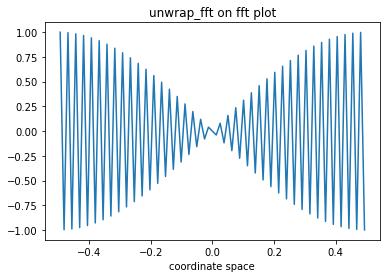

In [15]:
t=np.linspace(-1,1,79)
tfunc=np.zeros(len(t),dtype='complex')
tfunc[len(t)//2]=1

plt.plot(unwrap_fft(np.fft.fftfreq(79)),unwrap_fft(np.imag(np.fft.fft(tfunc))))
plt.title("unwrap_fft on fft plot")
plt.xlabel("coordinate space")
plt.show()

as desired

## plot_fourier4
I use class to define plot_fourier4 instead of function. There's no particular reason for using class and the way I used it is quite redundant (like in 'stupid classes' of https://eev.ee/blog/2013/03/03/the-controller-pattern-is-awful-and-other-oo-heresy/). I just wanted some practice with it.

In [22]:
class plot_fourier4(object):
    """ creates an instance with time coordinates, time series, and 4 plotting information ax:
        1. real and imaginary of input
        2. real and imaginary of fft of input
        3. magnitude and phase of input
        4. magnitude and phase of fft of input"""
    
    def __init__(self,t,tfunc,a,b,c,d):
        """
        t = input time 
        tfunc = input time series
        a = real and imaginary of input
        b = real and imaginary of fft of input
        c = magnitude and phase of input
        d = magnitude and phase of fft of input"""
        self.t=t
        self.tfunc=tfunc
        self.a11=a
        self.a12=b
        self.a21=c
        self.a22=d
        
        
    def setxlim(self,axx,xlim):
        """changes the xlimit of a specific plot."""
        axx.set_xlim(xlim)
        
    def setylim(self,ayy,ylim):
        """changes the ylimit of a specific plot."""
        ayy.set_ylim(ylim)
        
    def pplot(self):
        """plots"""
        
        #freq and fft 
        f=np.fft.fftfreq(len(tfunc),(t[-1]-t[0])/len(t)) # spacing
        ffunc=np.fft.fft(tfunc)
        
        #unwrap them
        f=unwrap_fft(f)
        ffunc=unwrap_fft(ffunc)


        #a11
        self.a11.plot(t,np.real(tfunc),'-',label='Real')
        self.a11.plot(t,np.imag(tfunc),'--',label='Imag')
        self.a11.legend()
        self.a11.set_title("f(t)")
        self.a11.set_xlabel("time")
        self.a11.set_ylabel("Real and Imaginary")

        #a21
        self.a21.plot(t,np.abs(tfunc),'-',label='Magnitude')
        tmp=np.angle(tfunc) #angles
        tmp[np.isnan(tmp)]=0
        self.a21.plot(t,tmp,'--',label='Phase')
        self.a21.legend()
        self.a21.set_title("f(t)")
        self.a21.set_xlabel("time")
        self.a21.set_ylabel("Magnitude and Phase")

        # a12
        self.a12.plot(f,np.real(ffunc),'-',label='Real')
        self.a12.plot(f,np.imag(ffunc),'--',label='Imag')
        self.a12.legend()
        self.a12.set_title("F(f)")
        self.a12.set_xlabel("frequency")
        self.a12.set_ylabel("Real and Imaginary")

        # a22
        self.a22.plot(f,np.abs(ffunc),'-',label='Magnitude')
        tmp=np.angle(ffunc) #angles
        tmp[np.isnan(tmp)]=0
        self.a22.plot(f,unwrap_fft(tmp),'--',label='Phase')
        self.a22.legend()
        self.a22.set_title("F(f)")
        self.a22.set_xlabel("frequency")
        self.a22.set_ylabel("Magnitude and Phase")
        
    

In [23]:
def mydft(x):
    """performs slow discrete fourier transform on a data. Used for occasional experiments but unused in the final notebook.
    arg:
        x : input data
    return:
        y: fft of input data"""
    
    for k in range(len(x)):
        y.append(sum([x[n]*np.exp(-1j*2*np.pi*k*n/len(x)) for n in range(len(x)) ] ) )
    y=np.array(y)
    
    return y

### example: peak near beginning

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


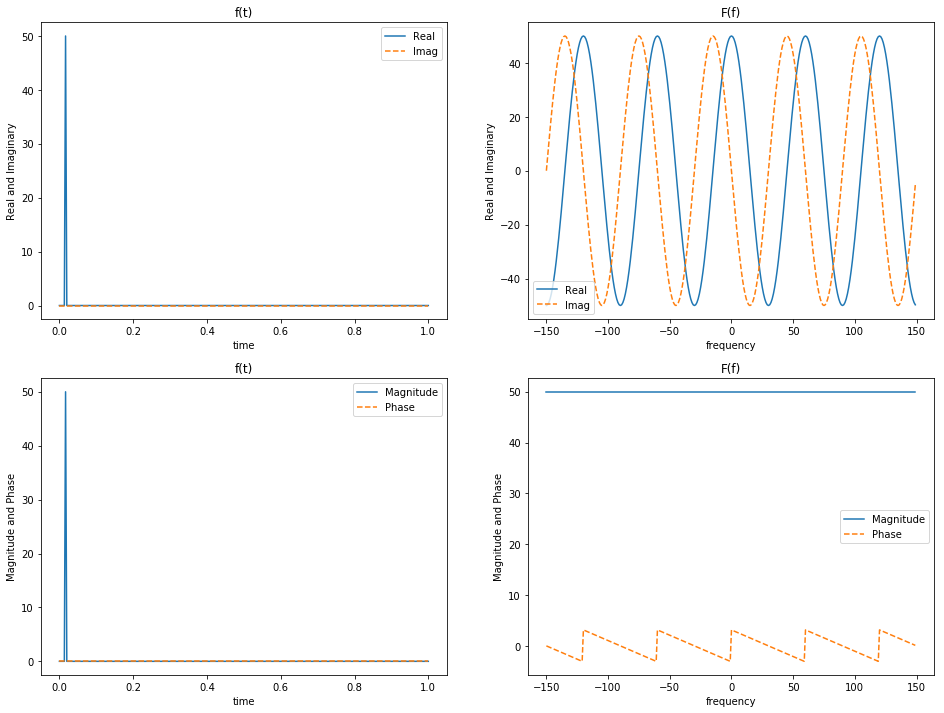

In [25]:
#setup input
t=np.linspace(0,1,300)
tfunc=np.zeros(len(t))
tfunc[5]=50

#setup figure
fig,ax=plt.subplots(2,2,figsize=[16,12])
[a,b],[c,d]=ax

#create instance
const=plot_fourier4(t,tfunc,a,b,c,d)
const.pplot()

plt.show()

### Task: Calculate the Fourier transform $F(\omega)$ for each of the following functions

Constant
 $$ f(t) = C $$

Single spike at the origin
 $$ f(t) = \delta(t) $$

Two spikes at $\pm t_0$
 $$ f(t) = \delta(t-t_0) + \delta(t+t_0)  $$

Cosine
 $$ f(t) = \cos(\omega_0 t) $$

Sine
 $$ f(t) = \sin(\omega_0 t) $$
 
Tophat
 $$ f(t) = 1 \qquad\mathrm{if}\quad -t_0 \le t \le +t_0 \qquad \mathrm{else} \quad 0$$ 

Here I solve all of the above analytically and compare with the plot_fourier4. 

## Constant


$$ f(t) = C $$
$$
\begin{align}
F(f)&=\int_{-\infty}^{\infty}Ce^{-i2\pi tf} dt\\
&=C\int_{-\infty}^{\infty}e^{-i2\pi tf} dt\\
&=C\delta(t-0)
\end{align}
$$
by definition of Dirac Delta

## plot
Note: 
1. Plots here are not normalized (by dividing by number of samples) unlike in the notebook phys481_week10_fourier_part2.
2. In all the plots, I denote $f(t)$ as input function (function of time t) and $F(f)$ (function of frequency f) as fourier transformed function. 
3. Some plots have attached comments


C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


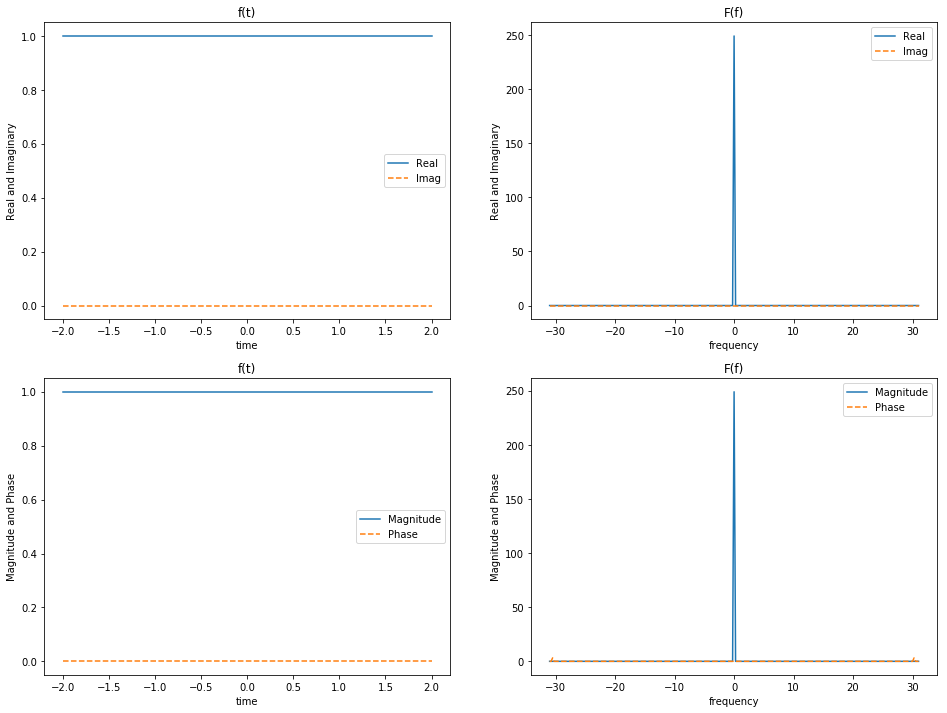

In [26]:
#setup input
t=np.linspace(-2,2,249)
tfunc=np.ones(len(t),dtype='complex')

#setup figure
fig,ax=plt.subplots(2,2,figsize=[16,12])
[a,b],[c,d]=ax

#create instance
singlespike=plot_fourier4(t,tfunc,a,b,c,d)
singlespike.pplot()
plt.show()

## Single spike at the origin
 $$ f(t) = \delta(t) $$
 
$$
\begin{align}
F(f)&=\int_{-\infty}^{\infty}\delta(t-0)e^{-i2\pi tf} dt\\
&=e^{-2\pi f(t=0)}\\
&=1
\end{align}
$$

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


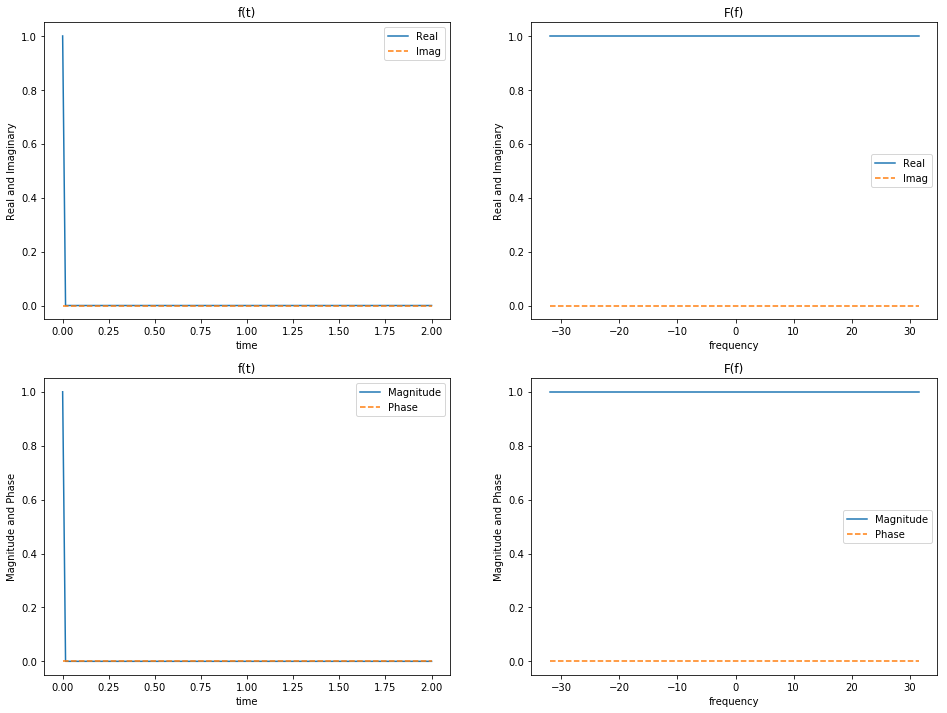

In [27]:
#setup input
t=np.linspace(0,2,128)
tfunc=np.zeros(len(t),dtype='complex')
tfunc[0]=1

#setup figure
fig,ax=plt.subplots(2,2,figsize=[16,12])
[a,b],[c,d]=ax

#create instance
obj=plot_fourier4(t,tfunc,a,b,c,d)
obj.pplot()

plt.show()

## Two spikes at $\pm t_0$
 $$ f(t) = \delta(t-t_0) + \delta(t+t_0)  $$

$$
\begin{align}
F(f)&=\int_{-\infty}^{\infty}\delta(t-t_o)e^{-i2\pi tf} dt+\int_{-\infty}^{\infty}\delta(t-(-t_o))e^{-i2\pi tf} dt\\
&=e^{-2i\pi f(t_0)}+e^{-2i\pi f(-t_0)}\\
&=cos(2\pi t_0f)-isin(2\pi t_o f)+cos(2\pi t_0f)+isin(2\pi t_o f)\\
&=2cos(2\pi t_o f)
\end{align}
$$

### plots

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


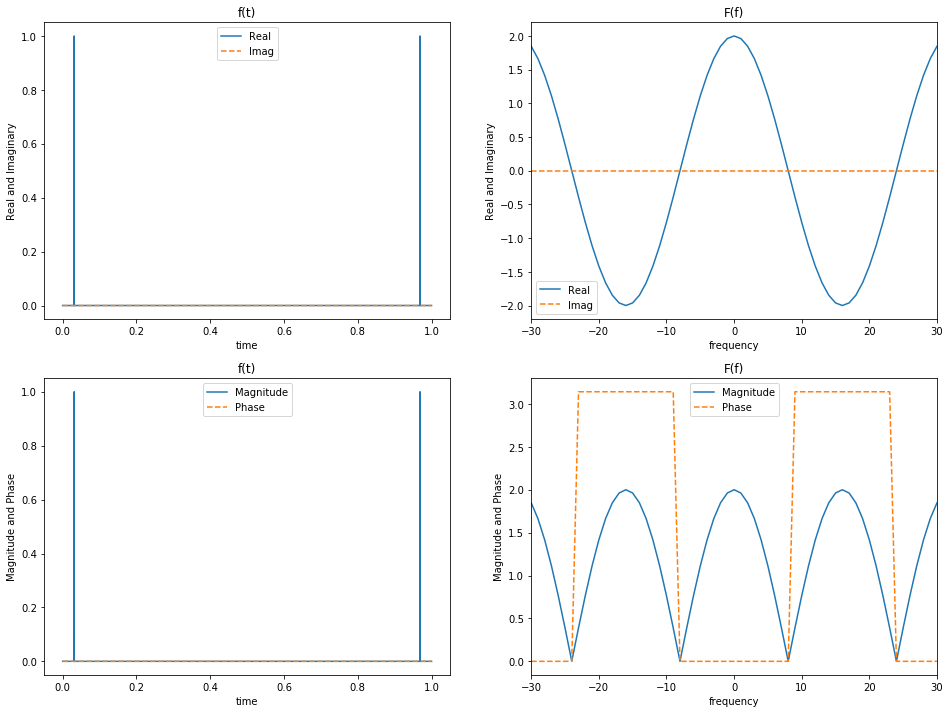

In [28]:
#setup input
t=np.linspace(0,1,16*2048+1)[0:-1]
tfunc=np.zeros(len(t),dtype='complex')
tfunc[4*256]=1+0j
tfunc[-4*256]=1+0j

#setup figure
fig,ax=plt.subplots(2,2,figsize=[16,12])
[a,b],[c,d]=ax

#create instance
obj=plot_fourier4(t,tfunc,a,b,c,d)
obj.pplot()
obj.setxlim(b,[-30,30])
obj.setxlim(d,[-30,30])

plt.show()

#### comment
1. It was observed that as the spacing between the two spikes get closer, the FT loses its cosine properties and behave more like a amplitude modulated cos wave.  

2. The range of t and location of peaks were carefully chosen so that they are in $\{2^n : n\in \mathbb{N}\}$. Otherwise Complex components were non-negligibly present in real/complex plot of F(f)

## Cosine
 $$ f(t) = \cos(\omega_0 t) $$
define $\omega_0:=2\pi f_0$
$$
\begin{align}
F(f)&=\int_{-\infty}^{\infty} cos(\omega_0 t)e^{-i2\pi tf} dt\\
&=\int_{-\infty}^{\infty} \left(\frac{e^{-i 2\pi f_0 t} +e^{i2\pi f_0 t}}{2}\right) e^{-i2\pi tf} dt\\
&=\int_{-\infty}^{\infty} \left(\frac{e^{-i 2\pi f_0 t} }{2}\right) e^{-i2\pi ft} dt+
\int_{-\infty}^{\infty} \left( \frac{e^{i2\pi f_0 t}}{2}\right) e^{-i2\pi ft} dt\\
&=\frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f_0+f)t}dt +
\frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f-f_0)t}dt\\
&=\frac{1}{2}\delta(f_0-f)+\frac{1}{2}\delta(f_0+f)
\end{align}
$$

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


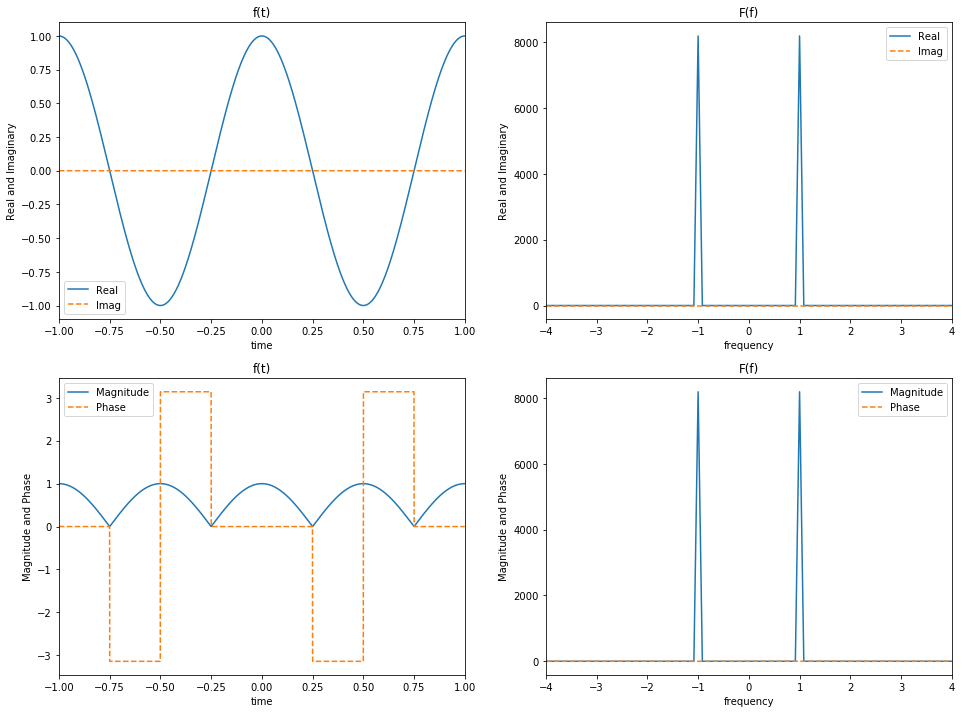

In [784]:
#setup input
t=np.linspace(-6,6,1024*16)[:-1]
tfunc=np.cos(2*np.pi*t,dtype='complex')

#setup figure
fig,ax=plt.subplots(2,2,figsize=[16,12])
[a,b],[c,d]=ax

#create instance and adjust xrange dramatically
obj=plot_fourier4(t,tfunc,a,b,c,d)
obj.pplot()
#d.set_ylim([-4,4])
obj.setxlim(a,[-1,1])
obj.setxlim(b,[-4,4])
obj.setxlim(c,[-1,1])
obj.setxlim(d,[-4,4])
plt.show()


## Sine
 $$ f(t) = \sin(\omega_0 t) $$
define $\omega_0:=2\pi f_0$
$$
\begin{align}
F(f)&=\int_{-\infty}^{\infty} sin(\omega_0 t)e^{-i2\pi tf} dt\\
&=\int_{-\infty}^{\infty} \left(\frac{e^{i 2\pi f_0 t} -e^{-i2\pi f_0 t}}{2}\right) e^{-i2\pi tf} dt\\
&=\int_{-\infty}^{\infty} \left(\frac{e^{i 2\pi f_0 t} }{2}\right) e^{-i2\pi ft} dt-
\int_{-\infty}^{\infty} \left( \frac{e^{-i2\pi f_0 t}}{2}\right) e^{-i2\pi ft} dt\\
&=\frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f_0+f)t}dt -
\frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f_0-f)t}dt\\
&=\frac{1}{2}\delta(f_0+f)-\frac{1}{2}\delta(f_0-f)
\end{align}
$$

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


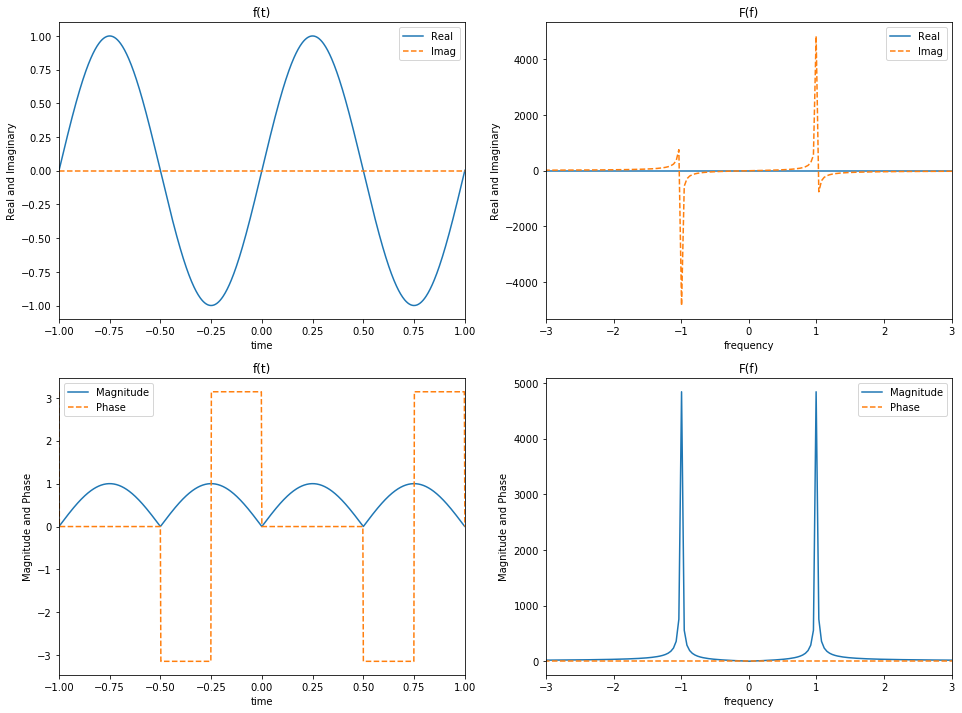

In [29]:
#setup input
t=np.linspace(-4*np.pi,4*np.pi,9999)[:-1]
tfunc=np.sin(2*np.pi*t,dtype='complex')

#setup plot
fig,ax=plt.subplots(2,2,figsize=[16,12])
[a,b],[c,d]=ax

#create instance
obj=plot_fourier4(t,tfunc,a,b,c,d)
obj.pplot()
obj.setxlim(a,[-1,1])
obj.setxlim(b,[-3,3])
obj.setxlim(c,[-1,1])
obj.setxlim(d,[-3,3])
plt.show()

#### comment
depending on the range of t chosen (i.e [-1,1], [-3,3]), Imaginary component of $F(f)$ is not invariant. For some, they are both 'peaked-up' or 'peaked-down' or somewhere in between.

## Tophat
 $$ f(t) = 1 \qquad\mathrm{if}\quad -t_0 \le t \le +t_0 \qquad \mathrm{else} \quad 0$$ 
 \begin{align}
 \int_{t_0}^{-t_0} e^{-i2\pi ft}dt&=\frac{1}{-i2\pi f}e^{-i2\pi ft} \Bigr|^{t_0}_{-t_0}\\
 &=\frac{1}{-i2\pi f} (e^{-i2\pi ft_0}-e^{i2\pi ft_0})\\
 &=\frac{1}{-i2\pi f} (cos(2\pi ft_0)-isin(2\pi ft_0)-cos(2\pi ft_0)-isin(2\pi ft_0))\\
 &=\frac{1}{\pi f} sin(2\pi ft_0)
 \end{align}
 It's easy to see that the 'contribution' from the rest of the interval is zero.

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide


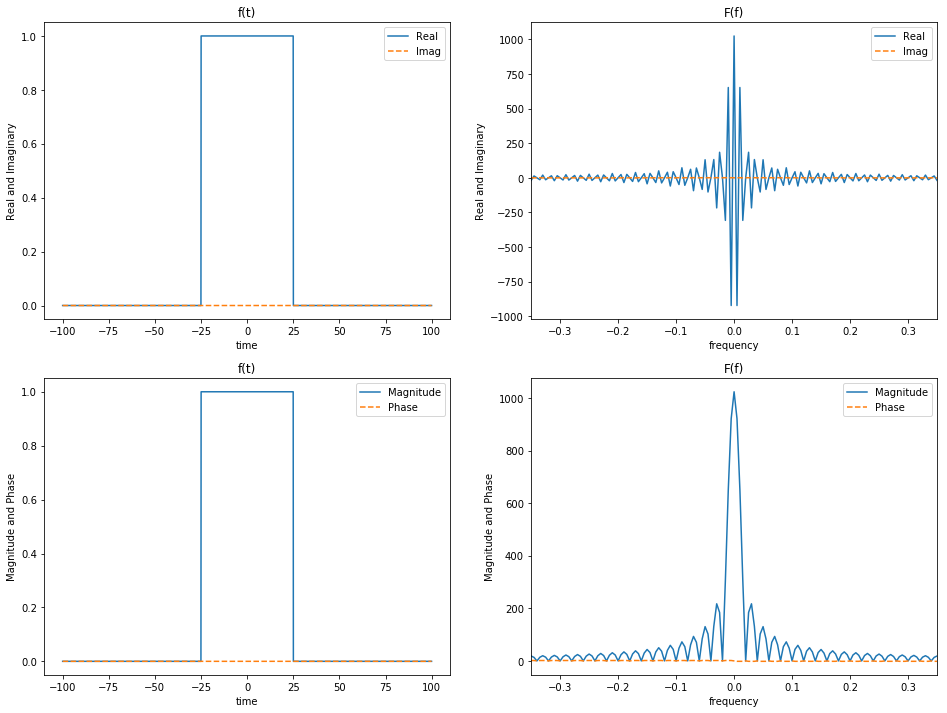

In [596]:
#setup input
t=np.linspace(-100,100,4096+1)[0:-1]
tfunc=np.zeros(len(t),dtype='complex')
tfunc[1024+512:-1024-512]=1.0+0j

#setup figure
fig,ax=plt.subplots(2,2,figsize=[16,12])
[a,b],[c,d]=ax

#create instance
obj=plot_fourier4(t,tfunc,a,b,c,d)
obj.pplot()
#obj.setxlim(a,[-0.2,0.2])
obj.setxlim(b,[-0.35,0.35])
#obj.setxlim(c,[-4,4])
obj.setxlim(d,[-0.35,0.35])
plt.show()

#### comment
1. It's challenging to achieve both very smooth $F(f)$ plot and reasonably large top hat width. 

## Discussion. FT vs DFT

Note that Discrete Fourier Transform (used by numpy) onto N finite samples: $x_n$ has the definition 
$$X_k=\sum_{n=0}^{N-1}x_n\cdot e^{-i2\pi kn/N}$$

as opposed to the Fourier Transform
$$ F(k) =  \int_{-\infty}^{+\infty} f(x) \; e^{-i2\pi kx} \; dx $$

In the above section, I tried matching the result of F(k) with that of $\{X_k\}$, which is reasonably since DFT can be thought of as sampling of FT so that DFT is approximating the continuous space of FT with discrete samples. But as it is the case for all approximations, DFT faces shortcomings and inconsistencies with respect to FT. An example is demonstrated by DFT of Gaussian:

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


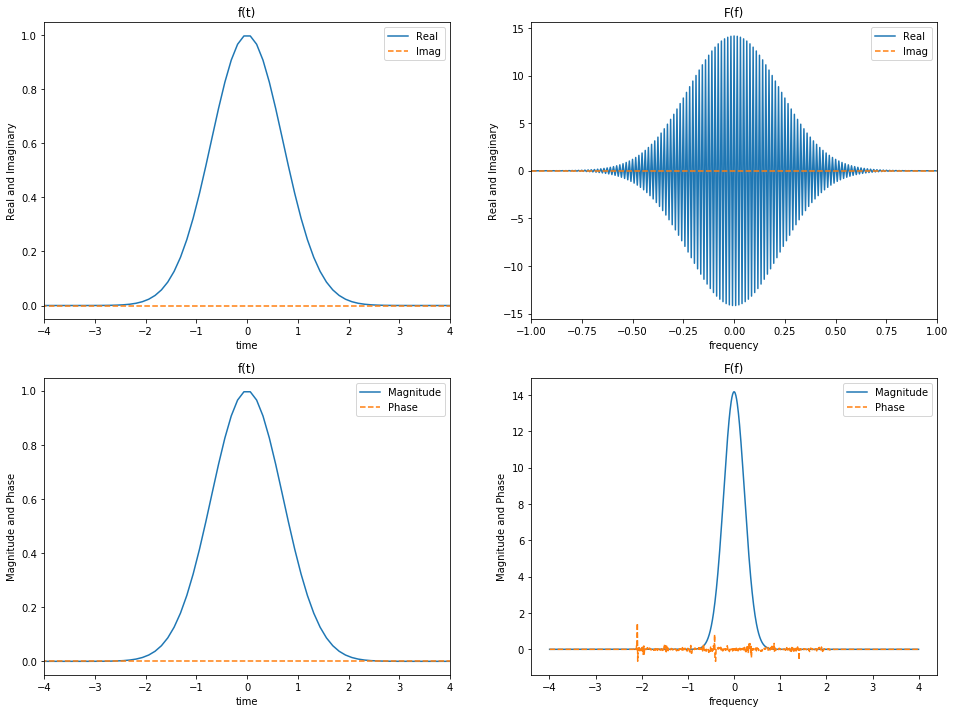

In [519]:
def gaussian(a,x):
    """Creates gaussian function of the form exp(-ax^2)
    args:
        a(float): coefficient
        x(np.ndarray): coordinate space
    returns:
        gaussian function np.exp(-a*x**2)"""
    
    return np.exp(-a*x**2)

#setup input
t=np.linspace(-64,64,1024)[0:-1]
tfunc=gaussian(1,t)

#setup figure
fig,ax=plt.subplots(2,2,figsize=[16,12])
[a,b],[c,d]=ax

#create instance
obj=plot_fourier4(t,tfunc,a,b,c,d)
obj.pplot()

obj.setxlim(a,[-4,4])
obj.setxlim(b,[-1,1])
obj.setxlim(c,[-4,4])

#obj.setxlim(d,[-1,1])
plt.show()

It's very tempting to look at the magnitude plot and conclude that DFT of Gaussian is Gaussian, but since the definition of DFT doesn't have any absolute value, this assumption is very wrong. So DFT of Gaussian is not Gaussian unlike in Fourier Transform case.

It would be nice to have a qualitative/quantitative statement about when DFT closely approximates the FT (other than turning the discrete space into an dense interval). Inconsistencies were observed in FFT of non-periodic f(t) (Gaussian, Dirac Delta), so perhaps if the input is periodic, we can claim $F(f)\equiv \{X_f\}$, but there is an obvious counter example to this, which is sin function above (comment). Thus more advanced analysis is required.

### Final Task:
Change the time Scale for generating a set of 128 points as shown and discuss any changes in the corresponding FFT

Let 
$$f(t)=e^{-i2\pi t}$$

Given the context of what the question is trying to get at, WLOG I use (0,1.0,101)[:-1] , (0,1.0,100) instead of what is given in the question because these are simpler.

###  Case 1: (0,1.0,101)[0:-1]

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


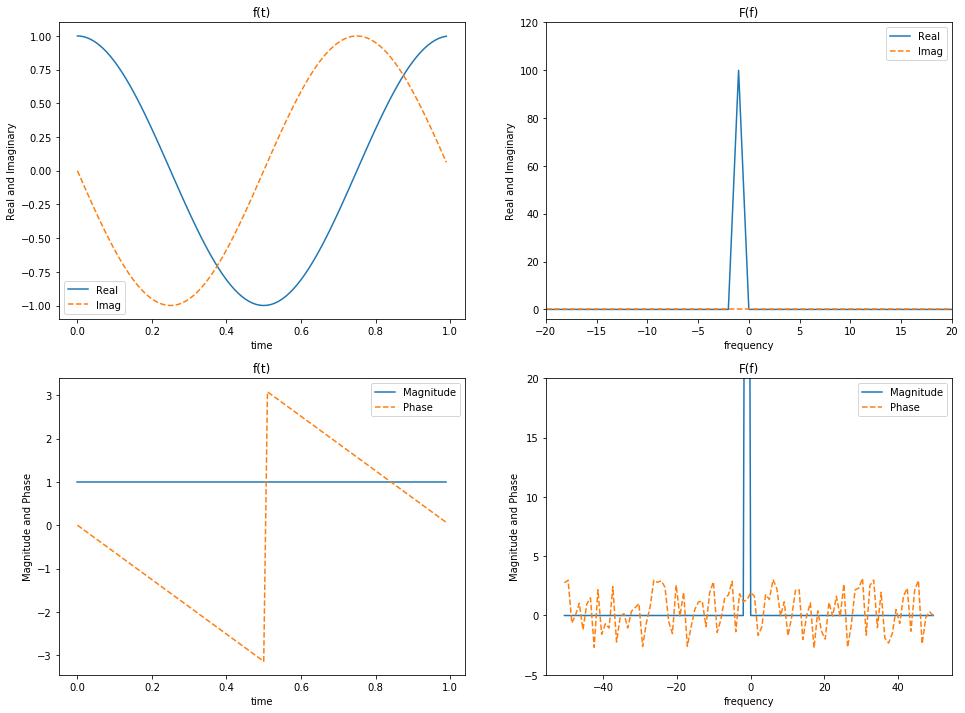

In [30]:
#setup input
t=np.linspace(0,1.0,101)[0:-1]
tfunc=np.exp(-1j*t*2.0*np.pi)

#setup figure
fig,ax=plt.subplots(2,2,figsize=[16,12])
[a,b],[c,d]=ax

#create instance
obj=plot_fourier4(t,tfunc,a,b,c,d)
obj.pplot()
d.set_ylim([-5,20])
b.set_ylim([-4,120])
#d.set_xlim([-6,6])
b.set_xlim([-20,20])
plt.show()


### Case 2: (0,1.0,128)

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


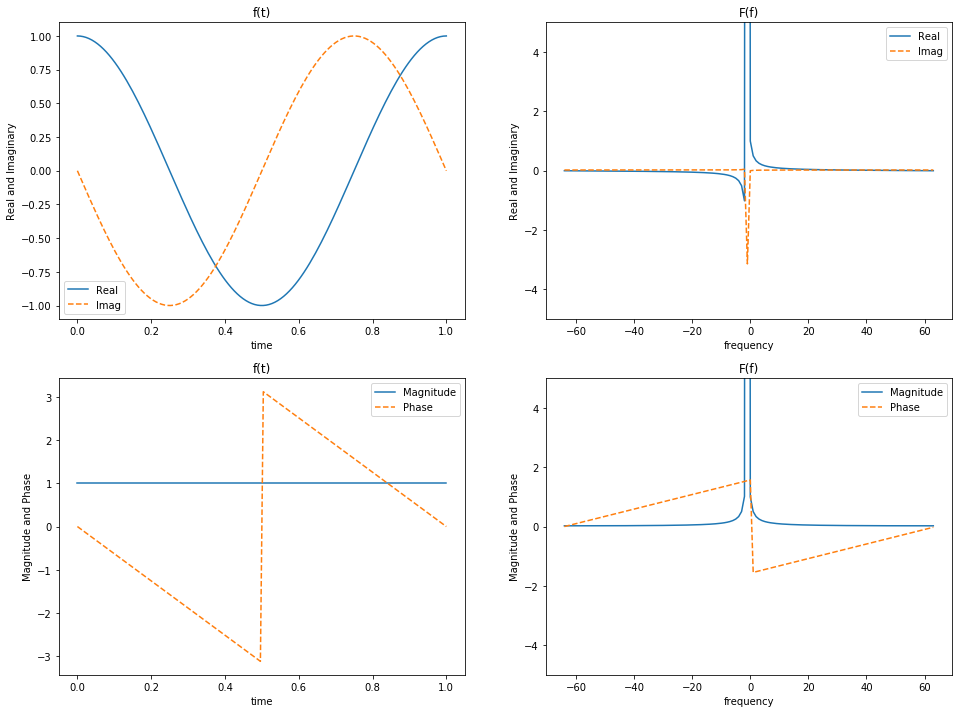

In [709]:
#setup input
t=np.linspace(0,1.0,128)
tfunc=np.exp(-1j*t*2*np.pi)

#setup figure
fig,ax=plt.subplots(2,2,figsize=[16,12])
[a,b],[c,d]=ax

#setup instance
obj=plot_fourier4(t,tfunc,a,b,c,d)
obj.pplot()
d.set_ylim([-5,5])
b.set_ylim([-5,5])
#obj.setxlim(a,[-4,4])
#obj.setxlim(b,[-1,1])
#obj.setxlim(c,[-5,5])
#obj.setxlim(d,[-1,1])
plt.show()

## Discussion
Lots of noise in phase are present in case 1 while phase behaves linearly for case 2.  
First note the same size between case 1 and case 2

In [714]:
assert len(np.linspace(0,1.0,101)[:-1])== len(np.linspace(0,1.0,100))

and what a first 10 elements of np.fft.freq returns for N=100:

In [728]:
np.fft.fftfreq(100,1/100)[0:10]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

and the first 10 elements of case 1 and case 2:

#### case 1

In [730]:
np.linspace(0,1,101)[:-1][1:10]

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09])

#### case 2

In [726]:
np.linspace(0,1,100)[1:10]

array([ 0.01010101,  0.02020202,  0.03030303,  0.04040404,  0.05050505,
        0.06060606,  0.07070707,  0.08080808,  0.09090909])

For case 1, the frequency at which the fourier transform is done is an integer multiple of the time used to generate $f(t)$, thus for 100 points sinusoidal input, it is mapped exactly onto one of the frequencies of FFT'd space and the other 99 points are zero. But Python comes with floating point precision error. So the results for that 99 points are non-zero complex (with very small real and complex parts). Therefore the noise in phase observed in case 1 are essentially due to pseudorandomness of floating precision.

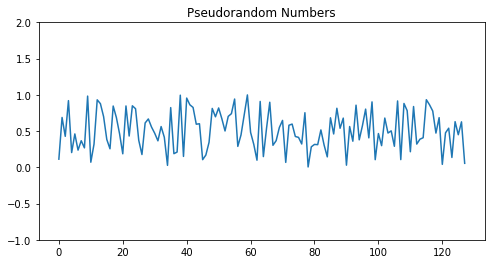

In [731]:
import random
y=[]
plt.figure(figsize=[8,4])
for i in np.arange(128):
    y.append(random.random())
plt.plot(np.arange(128),y)
plt.title("Pseudorandom Numbers")
plt.ylim([-1,2])
plt.show()

case 2 is a result of 'misalignment' between frequency and sampling time and it behaves linearly because this misalignment adds up as the sequence progresses.

## Conclusion

Although this notebook somewhat gives the impression that DFT is a flawed tool, mathematically, it is perfetly self-sufficient when not trying to mimic the FT by approximating the continuous space. But it just so happens that physical space is continuous (kind of. ignore quantum mechanics for now), and DFT works well as a translator that receives discretiezed observed samples of continuous space, and outputs a continuous fourier transformed function that is expected to be the fourier transform of the original continuous input. However, its result will always be examined closely to detect any of its shortcomings.
